In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Пример использования sklearn

In [2]:
x = pd.read_csv('../x.csv', index_col=0)
x = np.array([1.46, 1.13, -2.30, 1.74, 0.04, 
    -0.61, 0.32, -0.76, 0.58, -1.10, 
     0.87, 1.62, -0.53, -0.25, -1.07, 
    -0.38, -0.17, -0.32, -2.06, -0.88, ])

y = pd.read_csv('../y.csv', index_col=0)
y = np.array([101.16, 78.44, -159.24, 120.72, 2.92, 
    -42.33, 22.07, -52.67, 40.32, -76.10, 
     59.88, 112.38, -36.54, -17.25, -74.24, 
    -26.57, -11.93, -22.31, -142.54, -60.74,])

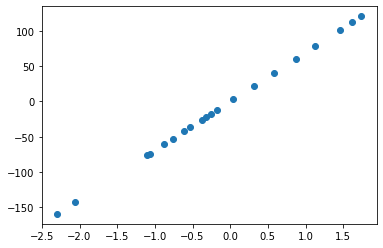

In [3]:
plt.figure()
plt.scatter(x,y)
plt.show()

In [4]:
x = x.reshape((-1, 1))
reg=linear_model.LinearRegression()
reg.fit(x,y)
print(reg.score(x,y))

0.9999954044390408


Коэффициенты: 
 [69.27158642]
Среднеквадратичная ошибка: 0.03
Коэффициент детерминации: 1.00


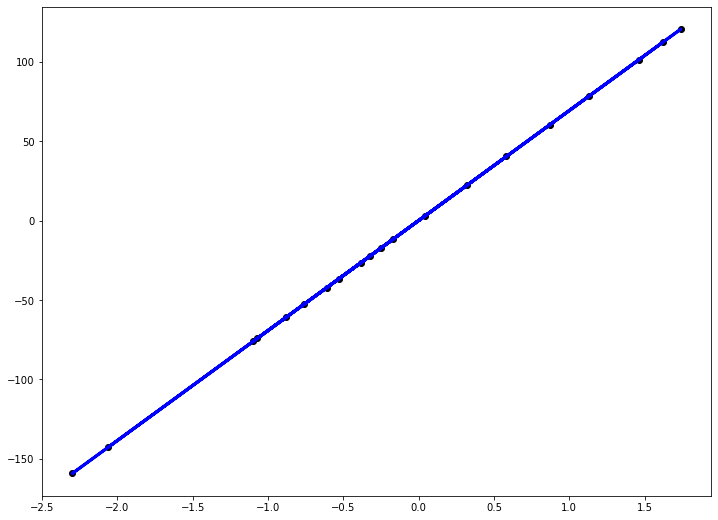

In [5]:
y_pred = reg.predict(x)
print("Коэффициенты: \n", reg.coef_)
print("Среднеквадратичная ошибка: %.2f" % mean_squared_error(y, y_pred))
print("Коэффициент детерминации: %.2f" % r2_score(y, y_pred))

plt.figure(figsize=(12, 9))
plt.scatter(x, y, color="black")
plt.plot(x, y_pred, color="blue", linewidth=3)
plt.show()

# Первая пара инструментов

In [4]:
mvid = pd.read_csv('MVID_101001_171001.txt')
sber = pd.read_csv('SBER_101001_171001.txt')

In [5]:
sber.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,SBER,D,20101001,0,89.09,332429890
1,SBER,D,20101004,0,89.88,194032721
2,SBER,D,20101005,0,91.97,198775753
3,SBER,D,20101006,0,91.20,210406027
4,SBER,D,20101007,0,90.40,145137617


In [6]:
res = pd.merge(sber, mvid, on='<DATE>')
res.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,SBER,D,20101001,0,89.09,332429890,MVID,D,0,194.38,19406
1,SBER,D,20101004,0,89.88,194032721,MVID,D,0,190.00,31039
2,SBER,D,20101005,0,91.97,198775753,MVID,D,0,187.00,17651
3,SBER,D,20101006,0,91.20,210406027,MVID,D,0,190.04,36482
4,SBER,D,20101007,0,90.40,145137617,MVID,D,0,199.85,204248


In [7]:
x = res['<CLOSE>_x']
y = res['<CLOSE>_y']

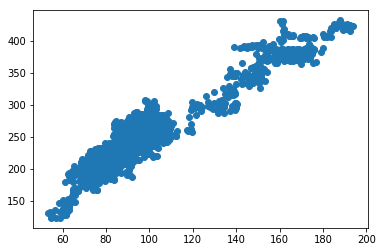

In [8]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [9]:
class hypothesis(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def predict(self, x):
        return self.b0 + self.b1 * x
    
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X))
    
    def BGD(
        self,
        X,
        Y,
        alpha=0.000005,
        accuracy=0.01,
        max_steps=50000,
        slowdown_step=10,
        slowdown=0.95,
        part=1/4
        
    ):
#         part_x = X
#         part_y = Y
        part_x = X.sample(frac=part).sort_index()
        part_y = Y[part_x.index]
        print(part_x)
        steps, errors, whole_err = [], [], []
        step = 0        
        old_err = self.error(part_x, part_y)
        new_err = self.error(part_x, part_y) - 1
        dJ = np.inf
        while (dJ > accuracy) and (step<max_steps):
            alpha= alpha*slowdown if not step%slowdown_step else alpha
            dJ0 = sum(self.predict(part_x) - part_y) /len(part_x)
            dJ1 = sum((self.predict(part_x) - part_y) * part_x) /len(part_x)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1            
            old_err = new_err
            new_err = self.error(part_x, part_y)
            if (new_err!=np.inf) and (not np.isnan(new_err)):
                dJ = abs(old_err - new_err)
            else:
                dJ = accuracy +1
            step += 1            
            steps.append(step)
            errors.append(new_err)
            whole_err.append(self.error(X, Y))
#             print('ALPHA', alpha)
        print('STEEEEPS', step, dJ, old_err, new_err)
        print(type(new_err))
        return steps, errors, whole_err

In [10]:
hypot = hypothesis()
print(hypot.predict(0))
print(hypot.predict(100))
J = hypot.error(x, y)
print("initial error:", J)


0
0
initial error: 36271.58344889084


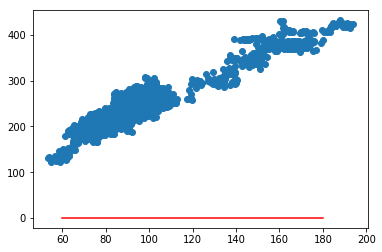

In [11]:
X0 = np.linspace(60, 180, 100)
Y0 = hypot.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

11       94.96
12       95.37
19       99.35
22      102.35
25      103.59
26      100.44
31       95.26
34       98.70
37      101.31
42      103.34
47      104.67
49      104.92
51      107.25
55      105.60
59      106.23
60      105.12
65      107.08
70      107.66
72      105.61
74      105.98
75      108.60
78      105.90
79      106.40
96      100.34
97      102.10
104      99.77
107      95.00
108      94.47
110     100.16
118     106.93
         ...  
1638    150.28
1643    153.60
1645    159.59
1646    162.50
1654    165.80
1660    169.24
1667    160.70
1670    155.93
1671    153.00
1677    150.13
1679    143.00
1680    139.00
1684    143.49
1685    144.25
1688    147.10
1699    160.85
1702    161.98
1705    163.93
1708    160.22
1711    165.40
1722    172.51
1723    172.33
1730    179.80
1731    180.51
1736    183.66
1737    184.10
1739    183.12
1745    188.64
1753    192.54
1755    191.96
Name: <CLOSE>_x, Length: 440, dtype: float64
STEEEEPS 151 0.009343351738266392 289.42

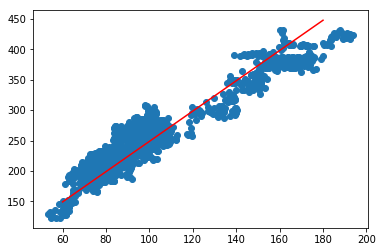

In [12]:
hypot.BGD(x, y)
J = hypot.error(x, y)
print("error after gradient descent:", J)

X0 = np.linspace(60, 180, 100)
Y0 = hypot.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [51]:
hypot = hypothesis()
steps, errors, all_err = hypot.BGD(
    x, y,
    accuracy=0.000001,
    alpha=0.000005,
    slowdown=0.95,
    slowdown_step=100
)
J = hypot.error(x, y)
print("error after gradient descent:", J)

STEEEEPS 500 inf 299.58518464133397 299.58510444421177
<class 'float'>
error after gradient descent: 298.83098209523604


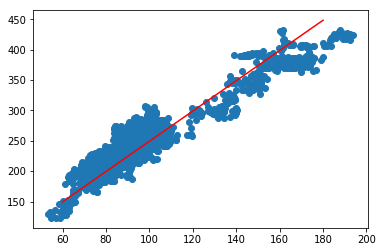

In [52]:
X0 = np.linspace(60, 180, 100)
Y0 = hypot.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

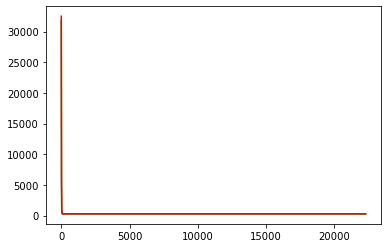

In [678]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.plot(steps, all_err, 'r')
plt.show()

# Другая пара инструментов

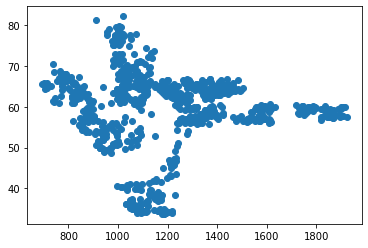

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

yndx = pd.read_csv('YNDX_101001_171001.txt')
usdrub = pd.read_csv('USDRUB_101001_171001.txt')
res2 = pd.merge(yndx, usdrub, on='<DATE>')
x2 = res2['<CLOSE>_x']
y2 = res2['<CLOSE>_y']
plt.figure()
plt.scatter(x2, y2)
plt.show()

In [3]:
class hypothesis(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def predict(self, x):
        return self.b0 + self.b1 * x
    
    def normalize(self, X):
        x_max = X.max()
        x_min = X.min()
        X = (X-x_min)/(x_max-x_min)
        return X, x_min, x_max-x_min
    
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X))
    
    def BGD(
        self,
        X,
        Y,
        alpha=0.000005,
        accuracy=0.01,
        max_steps=500,
        slowdown_step=10,
        slowdown=0.95,
        part=1/4,
        start_id=0,
        
    ):
        print(f'INIT BGD {start_id}')
#         part_x = X
#         part_y = Y
        def_part_x = X.sample(frac=part).sort_index()
        def_part_y = Y[part_x.index]
        
        part_x, x_min, x_diff = self.normalize(def_part_x)
        part_y, y_min, y_diff = self.normalize(def_part_y)
        
#         print(part_x)
        steps, errors, whole_err = [], [], []
        step = 0        
#         old_err = self.error(part_x, part_y)
        new_err = self.error(part_x, part_y)
        dJ = np.inf
        while (dJ > accuracy) and (step<max_steps):
            alpha= alpha*slowdown if not step%slowdown_step else alpha
            
            dJ0 = sum(self.predict(part_x) - part_y) /len(part_x)
            dJ1 = sum((self.predict(part_x) - part_y) * part_x) /len(part_x)
#             if dJ0==np.inf or dJ1==np.inf:
#                 break
                       
            
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            old_err = new_err
            new_err = self.error(part_x, part_y)
            if new_err > old_err:
                self.b0 = 0
                self.b1 = 0
                print(new_err, old_err, alpha, step)
                return self.BGD(
                    X,
                    Y,
                    alpha=alpha/10,
                    accuracy=accuracy,
                    max_steps=max_steps,
                    slowdown_step=slowdown_step,
                    slowdown=slowdown,
                    part=part,
                    start_id=start_id+1,
                )
            
            
#             if (new_err!=np.inf) and (not np.isnan(new_err)):
#             if np.isnan(new_err):
#                 print(alpha, dJ0, dJ1)
#             if (new_err!=np.inf):
            dJ = abs(old_err - new_err)
#             else:
#                 dJ = accuracy +1
            step += 1            
            steps.append(step)
            errors.append(new_err)
            whole_err.append(self.error(X, Y))
#             print('ALPHA', alpha)
#         self.b0 = self.b0*x_diff+x_min
#         self.b1 = self.b1*y_diff+y_min
        print('STEEEEPS', step, dJ, old_err, new_err)
#         print(type(new_err))
        return steps, errors, whole_err

INIT BGD 0
33207213727950.02 1715.33524121875 0.1 0
INIT BGD 1
372592281163.4191 1862.163805344375 0.01 0
INIT BGD 2
2312729545.0434666 2118.335317856875 0.001 0
INIT BGD 3
47197424.00876403 1826.680837984375 0.0001 0
INIT BGD 4
337496.0990984672 1560.3417096825 1e-05 0
INIT BGD 5
STEEEEPS 15 0.007419451149559109 118.80539955337952 118.79798010222996
error after gradient descent: 136.34212772161453


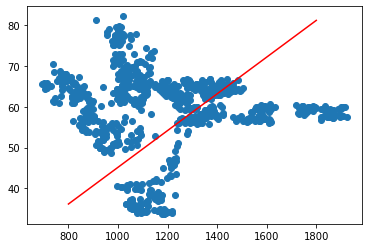

In [6]:
hyp2 = hypothesis()
steps, errors, whole_err = hyp2.BGD(
    x2, y2,
    accuracy=0.01,
    alpha=0.1,
    max_steps=5000,
    slowdown=1,
    slowdown_step=100,
    part=1/100
)
J = hyp2.error(x2, y2)
print("error after gradient descent:", J)
X02 = np.linspace(800, 1800, 100)
Y02 = hyp2.predict(X02)
plt.figure()
plt.scatter(x2, y2)
plt.plot(X02, Y02, 'r')
plt.show()

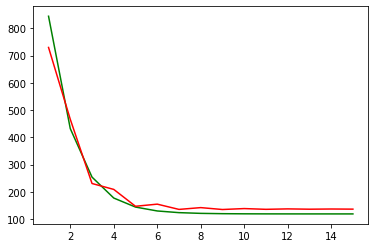

In [7]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.plot(steps, whole_err, 'r')
plt.show()

# То же самое только при помощи sklearn

In [773]:
x3 = np.array(res2['<CLOSE>_x'])
y3 = np.array(res2['<CLOSE>_y'])

In [774]:
x3= x3.reshape((-1,1))
# x = x.reshape((-1, 1))
reg=linear_model.LinearRegression()
reg.fit(x3,y3)
print(reg.score(x3,y3))

0.00019456424733388378


Коэффициенты: 
 [-0.00053488]
Среднеквадратичная ошибка: 104.34
Коэффициент детерминации: 0.00


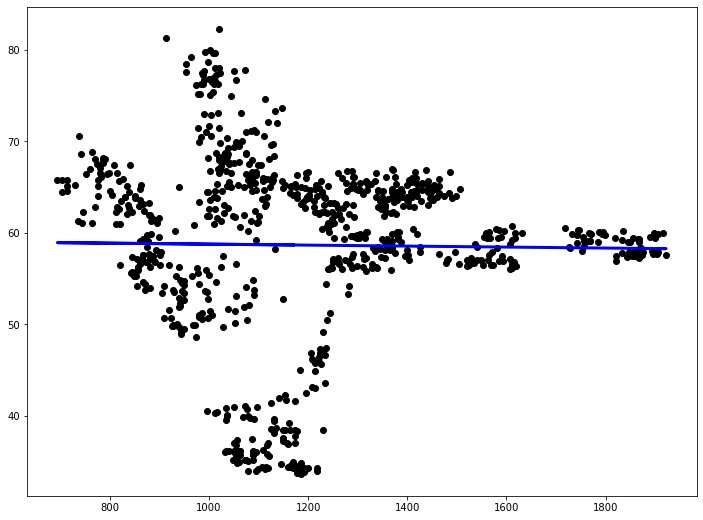

In [775]:
y_pred = reg.predict(x3)
y_pred = y_pred.reshape((-1, 1))
                        
print("Коэффициенты: \n", reg.coef_)
print("Среднеквадратичная ошибка: %.2f" % mean_squared_error(y3, y_pred))
print("Коэффициент детерминации: %.2f" % r2_score(y3, y_pred))

plt.figure(figsize=(12, 9))
plt.scatter(x3, y3, color="black")
plt.plot(x3, y_pred, color="blue", linewidth=3)
plt.show()

In [729]:
x2.sample(frac=1/2)

254     950.0
576    1341.0
93     1015.0
142     996.0
156    1165.0
        ...  
245     941.0
338     736.0
388    1075.1
780    1898.5
413    1017.4
Name: <CLOSE>_x, Length: 419, dtype: float64